In [1]:
"""
An implementation of linear regression using normal equation.
This will fit y = ax^2 + bx + c using normal equation method into the plot.
This is for Task 2 for HW1.

By 32190984 Isu Kim @ github.com/gooday2die
"""

'\nAn implementation of linear regression using normal equation.\nThis will fit y = ax^2 + bx + c using normal equation method into the plot.\nThis is for Task 2 for HW1.\n\nBy 32190984 Isu Kim @ github.com/gooday2die\n'

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('data_hw1.csv')  # Import data using pandas

In [3]:
def normal_equation(A, B):
    """
    A function that gets best X using normal equation.
    The formula that we use here is:
    X = inverse (A transponse mul A) mul (A transpose) mul B
    
    @param A: The vector A (Which contains 1000 x 3 size)
    @param B: The vector B (Which literally just stores 1000 x 1 size which contains y values.)
    @return Matrix X that was retrieved by normal equation.
    """
    X = np.matmul(np.transpose(A), A)  # Calculate Transpose A mul A
    X = np.linalg.inv(X)  # Calculate inverse of (Transpose A mul A)
    X = np.matmul(X, np.transpose(A))  # Calculate inverse mul Transpose A
    X = np.matmul(X, B)  # Calculate mul B
    
    return X

In [4]:
def run_task2(df):
    """
    A function that runs task2 from HW 1.
    
    @param df: The DataFrame that was retrieved by csv file.
    @return Matrix X that was retrieved by normal equation.
    """
    A = np.zeros((len(df.x), 3))  # Generate matrix for A
    for i in range(len(df.x)):
        A[i][0] = df.x[i] ** 2  # Calculate x^2
        A[i][1] = df.x[i]  # Calculate x
        A[i][2] = 1  # Calculate x^0 == 1
        
    B = np.zeros((len(df.y), 1))  # Generate matrix for B
    for i in range(len(df.y)):  # Store y values into B.
        B[i][0] = df.y[i]
        
    X = normal_equation(A, B)
    return X

In [5]:
X = run_task2(df)

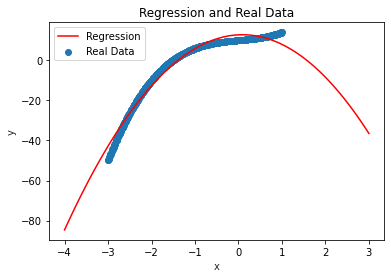

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# For printing our regression function into the plot.
x = np.linspace(-4,3,100)
y = X[0] * (x ** 2) + X[1] * x + X[2]

plt.plot(x, y, '-r', label='Regression')
plt.title('Regression and Real Data')

plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')

# Plot original data.
plt.scatter(df.x, df.y, label='Real Data')
plt.legend(loc='upper left')
plt.show()  # Our data looks like this.